### 01A. Linear Regression from Scratch using Python: Clarified (Part 1/3)

In [1]:
#Importing all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Generating example dataset

In [2]:
#Setting random seed
np.random.seed(42)

#Generating age (x) and salaries (y)
x = np.linspace(22,58,10) #Equally spaced 10 data points between age 22 and 58
e = np.random.randn(10) #Random error term
c = 20000 #Intercept I chose this randomly

#Salary based on age of an employee. I chose the equation randomly
y = 10000*x + c + e*80000

Visualizing example dataset

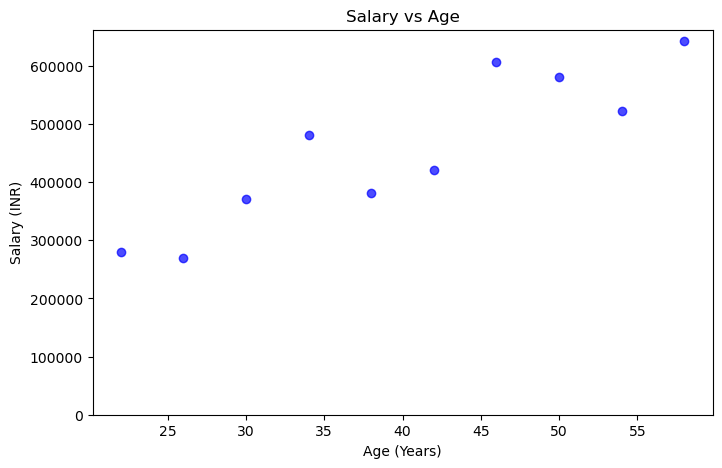

In [3]:
# Scatter plot between x1 and y
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.7)

# plt.scatter(np.mean(x), np.mean(y), color='black', marker="h",linewidths=10)
plt.title('Salary vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Salary (INR)')
plt.ylim(bottom=0)
plt.show()

### 1. Line Rotation Method

a. Creating 1M lines with different rotational angles 

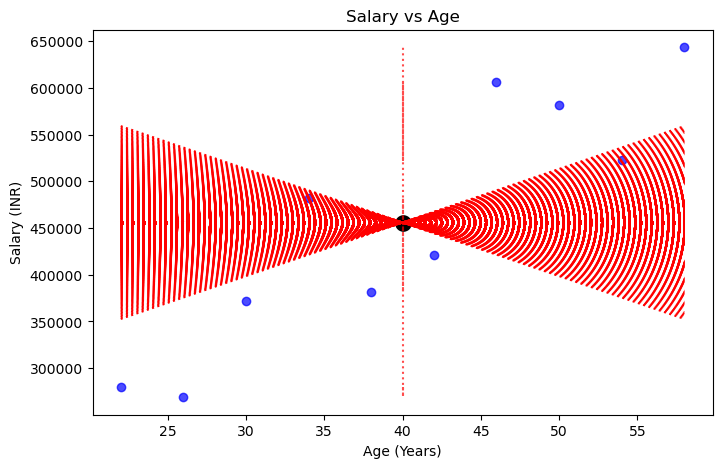

CPU times: total: 13min 14s
Wall time: 16min


In [4]:
%%time

#Calculate means
xm = np.mean(x)
ym = np.mean(y)

# Scatter plot between x and y
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.scatter(xm, ym, color='black', marker="o",linewidths=6)
plt.plot(np.repeat(xm,10), y, color='red', linestyle=':', alpha=0.7)

# Draw each line
angles_deg = np.linspace(89.99,-89.99,1000000)
angles_rad = np.deg2rad(angles_deg)
rss = []

for a in angles_rad:
    m = np.tan(a)
    c = ym - m*xm  #Equation to calculate c for the line which needs to be passed through center
    y_rot = m*x + c #y values after 1 single rotation
    plt.plot(x, y_rot, color='red', linestyle=':')
    rss_a = np.sum((y-y_rot)**2)
    rss.append(rss_a)

plt.title('Salary vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Salary (INR)')

plt.show()

b. Calculating the best slope, intercept and predictions

In [5]:
#Get the minimum RSS
min_rss = min(rss)

#Get the slope corresponding to the minimum RSS
pos = rss.index(min_rss)
degree = angles_rad[0]
best_slope = np.tan(degree)

#Calculate the best intercept 
int = ym - best_slope*xm

#Calculating prediction values
y_best = best_slope*x + int

print(f"Min RSS: {min_rss},\nBest Slope: {best_slope},\nBest Intercept: {int}")
print(f"Predictions: {y_best}")

Min RSS: 52626187066.54781,
Best Slope: 5729.577893128937,
Best Intercept: 226661.77321074298
Predictions: [352712.48685958 375630.7984321  398549.11000461 421467.42157713
 444385.73314964 467304.04472216 490222.35629467 513140.66786719
 536058.97943971 558977.29101222]


c. Visualizing the best fit line using line rotation method

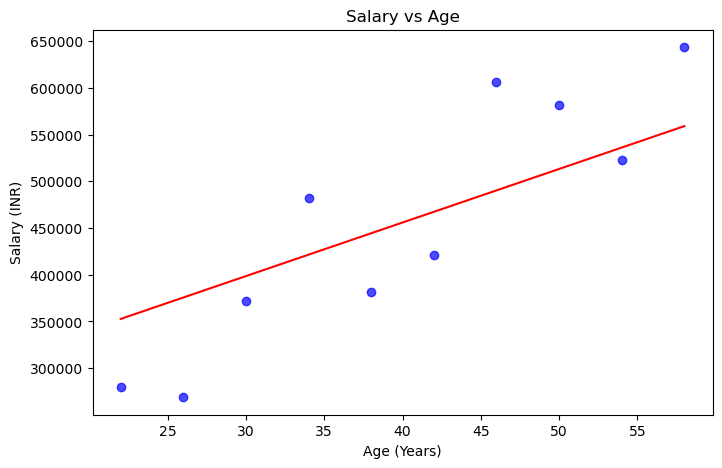

CPU times: total: 93.8 ms
Wall time: 259 ms


In [6]:
%%time

# Scatter plot between x and y
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.plot(x, y_best, color='red', linestyle="-")

plt.title('Salary vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Salary (INR)')

plt.show()

d. Visualizing RSS vs Slope from the line rotation method

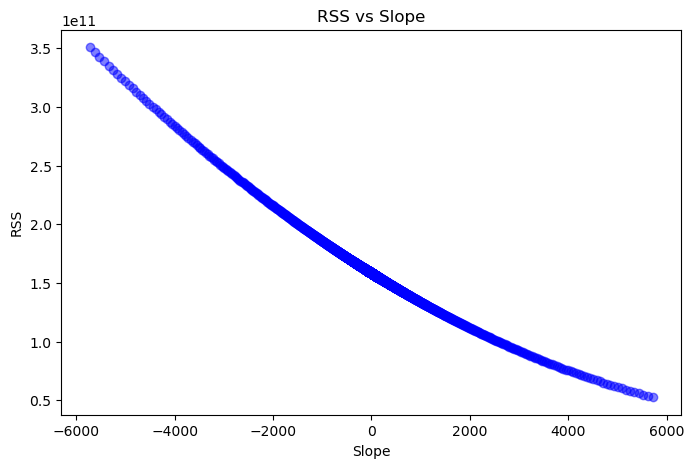

CPU times: total: 3.05 s
Wall time: 3.22 s


In [7]:
%%time

#Getting slopes for all RSS values
slopes = np.tan(angles_rad)

# Scatter plot between x and y
plt.figure(figsize=(8, 5))
plt.scatter(np.tan(angles_rad), rss, color='blue', alpha=0.5)

plt.title('RSS vs Slope')
plt.xlabel('Slope')
plt.ylabel('RSS')

plt.show()

### 2. Least Squares Method

a. Calculation of slope and intercept using least squares method

In [8]:
#Calculation of slope
m = np.sum((x-xm)*(y-ym))/np.sum((x-xm)**2)

#Calculation of intercept
c = ym - (m*xm)

#Calculation of predictions
y_pred = m*x + c

#New RSS
rss_new = np.sum((y-y_pred)**2)

print(f"Min RSS: {rss_new},\nBest Slope: {m},\nBest Intercept: {c}")
print(f"Predictions: {y_pred}")

Min RSS: 30084743705.331608,
Best Slope: 9861.99256632237,
Best Intercept: 61365.18628300569
Predictions: [278329.0227421  317776.99300739 357224.96327268 396672.93353797
 436120.90380326 475568.87406855 515016.84433383 554464.81459912
 593912.78486441 633360.7551297 ]


b. Visualizing best fit lines from least squares method and line rotation method

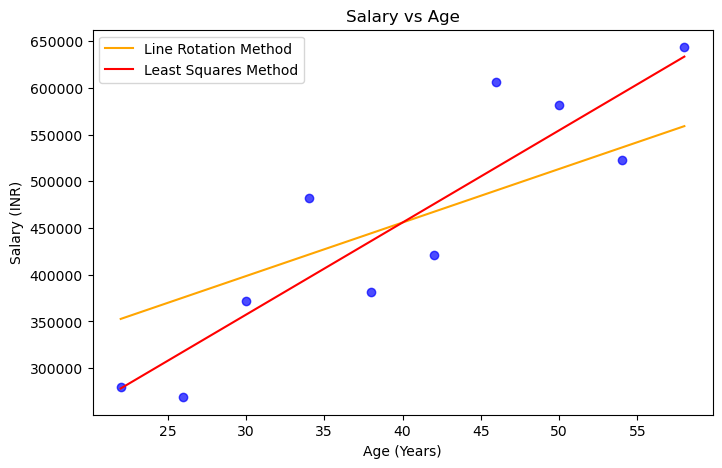

CPU times: total: 78.1 ms
Wall time: 91.1 ms


In [9]:
%%time

# Scatter plot between x and y
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.plot(x, y_best, color='orange', linestyle="-",label='Line Rotation Method')
plt.plot(x, y_pred, color='red', linestyle="-",label='Least Squares Method')

plt.title('Salary vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Salary (INR)')
plt.legend()

plt.show()

c. Visualizing RSS from least squares method and line rotation method

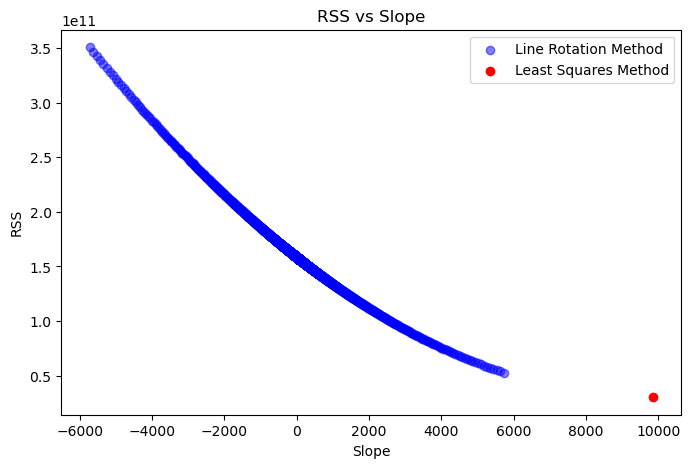

CPU times: total: 4.42 s
Wall time: 4.62 s


In [10]:
%%time

# Scatter plot between x and y
plt.figure(figsize=(8, 5))
plt.scatter(np.tan(angles_rad), rss, color='blue', alpha=0.5, label='Line Rotation Method')
plt.scatter(m, rss_new, color='red', alpha=1, label='Least Squares Method')

plt.title('RSS vs Slope')
plt.xlabel('Slope')
plt.ylabel('RSS')
plt.legend()

plt.show()

### 3. Normal Equation Method

a. Using Normal Equation in cases of multiple features

In [11]:
#Loading California housing dataset
data = datasets.fetch_california_housing()

#Getting a pandas dataframe
df = pd.DataFrame(data['data'])
df['target'] = data['target']
df.columns = data['feature_names']+data['target_names']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


b. Solving for coefficients and intercepts using Normal Equation and Regular Inverse

In [13]:
#Getting the x and y (regressors/features and target value)
x = np.array(df.drop('MedHouseVal',axis=1))
y = np.array(df['MedHouseVal'])

#Adding intercept to features
X = np.c_[np.ones((x.shape[0], 1)),x]

#Calculating different individual elements

X_T = X.T #X_transpose
XTX = X_T.dot(X) #X_transpose x X
XTX_1 = np.linalg.inv(XTX) #Inverse of XTX
beta = XTX_1.dot(X_T).dot(y) #Final coefficient

#Calculation of predictions
y_pred_norm = X.dot(beta)

#New RSS
rss_norm = np.sum((y-y_pred_norm)**2)

print(f"Min RSS: {rss_norm},\nBest Slopes: {beta[1:]},\nBest Intercept: {beta[0]}")
print(f"Predictions: {y_pred_norm}")

Min RSS: 10821.985154850292,
Best Slopes: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01],
Best Intercept: -36.94192020717156
Predictions: [4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]


c. Solving for coefficients and intercepts using Normal Equation and Moore Penrose Pseudo Inverse

In [14]:
#Getting the x and y (regressors/features and target value)
x = np.array(df.drop('MedHouseVal',axis=1))
y = np.array(df['MedHouseVal'])

#Adding intercept to features
X = np.c_[np.ones((X.shape[0], 1)),x]

#Calculating different individual elements
X_plus = np.linalg.pinv(X) #Pseudo Inverse
beta = X_plus.dot(y) #Final coefficient

#Calculation of predictions
y_pred_norm = X.dot(beta)

#New RSS
rss_norm = np.sum((y-y_pred_norm)**2)

print(f"Min RSS: {rss_norm},\nBest Slopes: {beta[1:]},\nBest Intercept: {beta[0]}")
print(f"Predictions: {y_pred_norm}")

Min RSS: 10821.985154850297,
Best Slopes: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01],
Best Intercept: -36.94192020718458
Predictions: [4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
